<a href="https://colab.research.google.com/github/zar55/COSC_635_Reinforcement_Learning/blob/main/Lab_05_zziauddin1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC-635: Lab 5

**Zargham Ziauddin**


## Getting Started

Follow the instructions below to set copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook by specifying your course number (435 or 635) and by replacing "Student Name" with your actual name.
5. Mount your Google Drive by running the cell below and accepting the prompts you are presented with.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preparing the Colab Environment

Run the cell below to install gymnasium and to download rltools to the virtual machine.

In [ ]:
%%capture
!pip install swig
!pip install gymnasium[box2d]==0.28.1
!pip install "stable-baselines3[extra]==2.0.0"
!rm rltools -r
!git clone https://github.com/drbeane/rltools.git
!git clone https://github.com/drbeane/rl_models.git


The cell below includes the import statements that you will need for this assignmnet.

In [ ]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import rltools.gym as gym
from rltools.utils import create_gif, evaluate
from rltools.utils import SB3Agent, sb3_evaluation_curves

from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


## Note on Variable Names

You are free to select the variable names for the objects that you create in this notebook. But please make sure that the variable names you select in Part 1 are distinct from those used in Part 2. An exception to this rulle can be made in instances where a particular variable will be used in a single cell, but no where else in the notebook.

# Part 1 - Cart Pole

In Part 1 of this assignment, you will train a DQN agent on the Cart Pole environment. We previously applied tabular methods such as Monte Carlo control and Q-Learning to the Cart Pole environment. Those techniques required us to discretize the environment states. The DQN algorithm, however, can be applied to environments with continuous state spaces.

**Your goal will be to train a model capable of consistenly keeping the pole upwrite for at least 1000 time steps.**

## 1.A - Create Environments

Use the cell below to create three instances of the Cart Pole environment, one for training, one for evaluation, and one for testing.

In each environment, set `max_angle=0.21`. Using the smaller angle range will make it easier for the agent to learn a good policy.  

In [ ]:
train_cartpole_env = gym.make(name = 'CartPole-v1',
                              render_mode = 'rgb_array',
                              max_angle = .21
                             )

eval_cartpole_env = gym.make(name = 'CartPole-v1',
                             render_mode = 'rgb_array',
                             max_angle = .21
                            )

test_cartpole_env = gym.make(name = 'CartPole-v1',
                             render_mode = 'rgb_array',
                             max_angle = .21
                            )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 1.B - Create Evaluation Callback

In the cell below, create an `EvalCallback` object using the evaluation environment. Set the calback to run the evalation every 1000 time steps, using 20 episodes for each evaluation. Set `warn=False`.

**Note: You will create two evaluation callbacks in this notebook. You should use different names for the directories associated with these callbacks.**

In [ ]:
if os.path.exists('cartpole_eval/') : shutil.rmtree('cartpole_eval/')
eval_callback = EvalCallback(eval_cartpole_env,
                             n_eval_episodes = 20,
                             eval_freq = 1000,
                             best_model_save_path = 'cartpole_eval/',
                             log_path = 'cartpole_eval/',
                             warn = False
                            )

## 1.C - Build and Train Model

Create an instance of `DQN`. Guidance for the parameter selection is provided in the list below. If a parameter is not mentioned, then use the default values for that parameter.

* `policy` - Set this to `"MLpPolicy"`.
* `env` - Set this to the environment you created for training.
* `learning_rate` - Experiment with values within the range  `[0.001, 0.1]`.  
* `gamma` - Experiment with values within the range `[0.9, 1.0]`.
* `exploration_fraction` - Experiment with values within the range `[0.1, 0.3]`.
* `exploration_final_eps` - Experiment with values within the range `[0.01, 0.1]`.
* `target_update_interval` - Set to 10.
* `train_freq` - Set to 256.
* `gradient_steps` - Set to -1.
* `batch_size` - Set to 64.
* `buffer_size` - Set to 100,000.
* `learning_starts` - Set to 1000.
* `policy_kwargs` - Use this to specify that the network should have 2 hidden layers, each with 256 nodes.

Train the model for somewhere between 30,000 and 50,000 timesteps, using the callback created in Step 1.B. Set `progress_bar=False`.

**Recall that your goal is to train an agent that can consistently keep the pole balanced upright for at least 1000 time steps.** This goal is achievable with 30,000 timesteps, with the right parameters. However, the model will likely be more stable and will exhibit better behavior if you train it for longer.




In [ ]:
cartpole_model = DQN(
                   policy = 'MlpPolicy',
                   env = train_cartpole_env,
                   learning_rate = .01,
                   gamma = .95,
                   exploration_fraction = .2,
                   exploration_final_eps = .01,
                   target_update_interval = 10,
                   train_freq = 256,
                   gradient_steps = -1,
                   batch_size = 64,
                   buffer_size = 100000,
                   learning_starts = 1000,
                   policy_kwargs = dict(net_arch = [256, 256])
                   )
cartpole_model.learn(total_timesteps = 50000, progress_bar = False, callback = eval_callback)

Eval num_timesteps=1000, episode_reward=8.30 +/- 0.64
Episode length: 9.30 +/- 0.64
New best mean reward!
Eval num_timesteps=2000, episode_reward=68.25 +/- 9.44
Episode length: 69.25 +/- 9.44
New best mean reward!
Eval num_timesteps=3000, episode_reward=139.30 +/- 8.88
Episode length: 140.30 +/- 8.88
New best mean reward!
Eval num_timesteps=4000, episode_reward=169.30 +/- 4.73
Episode length: 170.30 +/- 4.73
New best mean reward!
Eval num_timesteps=5000, episode_reward=116.65 +/- 7.34
Episode length: 117.65 +/- 7.34
Eval num_timesteps=6000, episode_reward=93.25 +/- 2.53
Episode length: 94.25 +/- 2.53
Eval num_timesteps=7000, episode_reward=106.05 +/- 7.02
Episode length: 107.05 +/- 7.02
Eval num_timesteps=8000, episode_reward=97.40 +/- 14.84
Episode length: 98.40 +/- 14.84
Eval num_timesteps=9000, episode_reward=89.55 +/- 6.09
Episode length: 90.55 +/- 6.09
Eval num_timesteps=10000, episode_reward=45.10 +/- 3.87
Episode length: 46.10 +/- 3.87
Eval num_timesteps=11000, episode_reward=47

## 1.D - Plot the Evaluation Results

Used the `sb3_evaluation_curves()` function to generate plots illustrating the progression of the scores for the evaluation environment during training.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


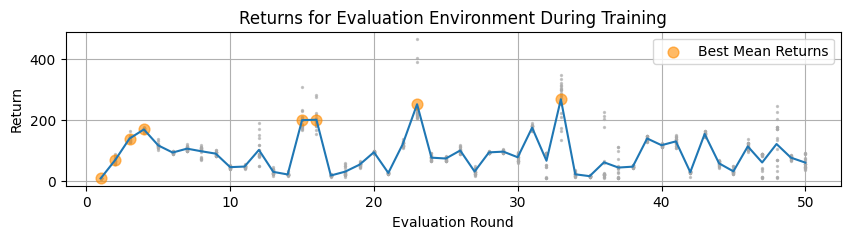

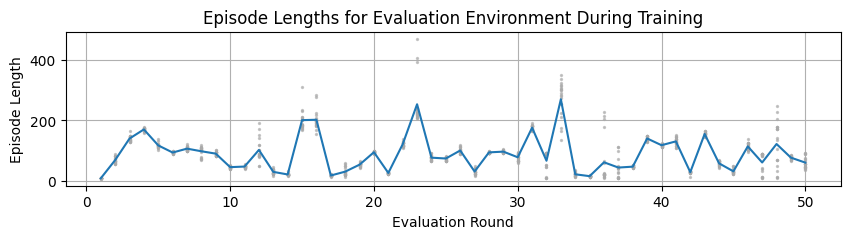

In [ ]:
sb3_evaluation_curves(path = 'cartpole_eval/')

## 1.E - Load and Evaluate the Best Model

Use the cell below to load the best model encountered during training, passing the test environment to the `env` parameter for the `DQN.load()` method. Create an instance of `SB3Agent` using this model. Then use the `evaluate()` function to score the model, setting `gamma=1.0`, `episodes=100`, and `max_steps=1000`.

**Your model should have a mean return of 1000.0.** If it does not, then you will need to adjust the parameters in part 1.C and train the model again. You should re-run the cells in 1.A and 1.B before re-running 1.C.

In [ ]:
best_cartpole = DQN.load('cartpole_eval/best_model.zip', env = test_cartpole_env)

cartpole_sb3 = SB3Agent(best_cartpole)

cartpole_eval = evaluate(env = test_cartpole_env,
                         agent = cartpole_sb3,
                         gamma = 1.0,
                         episodes = 100,
                         max_steps = 1000
                         )

Mean Return:    278.52
StdDev Return:  68.8469
Mean Length:    279.52
StdDev Length:  68.8469


## 1.F - Display Episode

Use the `create_gif()` function to display an episode guided by the trained DQN agent. Set `seed=1` and `max_steps=1000`.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


322 steps completed.
Cumulative reward: 321.0


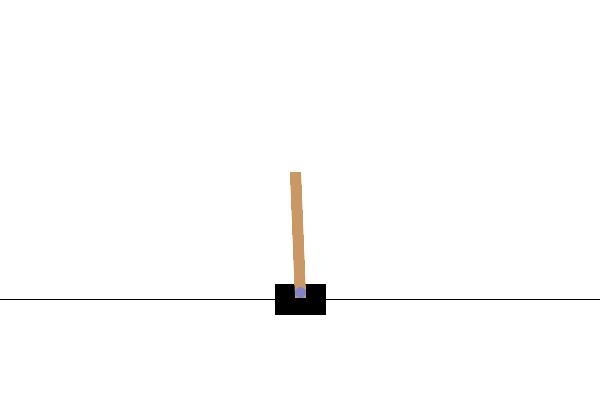

In [ ]:
create_gif(env = test_cartpole_env, agent = cartpole_sb3, seed = 1, max_steps = 1000, folder = 'gifs', filename = 'cartpole_sb3', display_gif = True)

# Part 2 - Lunar Lander

In Part 2 of this assignment, you will train a DQN agent on the Lunar Lander environment. Training a DQN agent to do well in this environment requires many episodes of training and can be a time-consuming process. We wil introduce algorithms and tools that will allow to more quickly train agents for this environments in later weeks.

This week, we will take the opportunity to get experience with loading and evaluating partially trained models. We will load several models that are at various stages in the training process and will observe how their behavior evolves over time. We will then perform some additional training on one such model.

The pre-trained models that you will be working with in this notebook can be found in the `rl_models/lunar_lander/` directory on the virtual machine hosting this notebook.

A notebook demonstrating a fully-trained version of the model can be found here: [DQN Demo - Lunar Lander](https://colab.research.google.com/drive/16C12ZYRScbG9WvkQIgxlpjrJNjjOKVJe?usp=sharing). You can view this notebook to see the paramaters that were used to train the model.

## 2.A - Create Environment

Use the cell below to create an instance of the lunar lander enviornment.

In [ ]:
ll_env = gym.make('LunarLander-v2', render_mode='rgb_array')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2.B - Load and Evaluate Untrained Model

We will start by analyzing a DQN agent that has not been trained. Perform the following steps in the cell below:
1. Use `DQN.load()` to load the model named `model_00000.zip`.
2. Use the loaded model to create an instance of `SB3Agent`.
3. Use the `evaluate()` function to evaluate the agent. Use `gamma=1.0`, `episodes=20`, `max_steps=1000`, and `seed=1`.
4. Create a gif demonstrating the agent's behavior. Use `max_steps=1000` and `seed=1`.

Mean Return:    -578.0025
StdDev Return:  182.3774
Mean Length:    68.1
StdDev Length:  11.67
79 steps completed.
Cumulative reward: -833.099


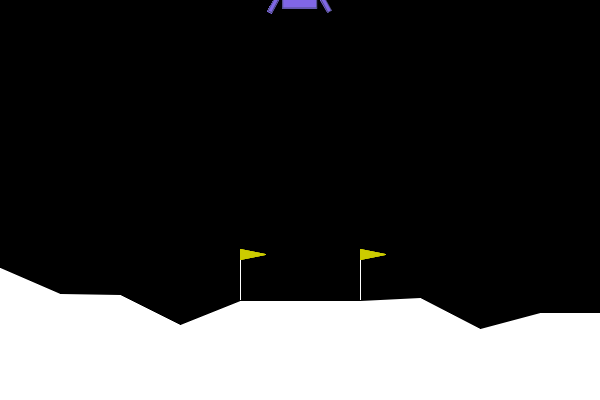

In [ ]:
best_lunar = DQN.load('rl_models/lunar_lander/model_00000.zip')

lunar_sb3 = SB3Agent(best_lunar)

lunar_eval = evaluate(ll_env,
                      lunar_sb3,
                      gamma = 1.0,
                      episodes = 20,
                      max_steps = 1000,
                      seed = 1)

create_gif(ll_env, lunar_sb3, max_steps = 1000, seed = 1, folder = 'gifs', filename = 'lunar_sb3', display_gif = True)

## 2.C - Load and Evaluation Partially Trained Model (5K)

We will now look at a model that has been trained for 5000 time steps. Repeat the steps from 2.B using the model stored in the file `model_05000.zip`. You should observe that the agent will have learned to avoid crashing, but makes no attempt to land.



Mean Return:    -141.5778
StdDev Return:  48.0114
Mean Length:    505.65
StdDev Length:  371.434
1000 steps completed.
Cumulative reward: -67.4147


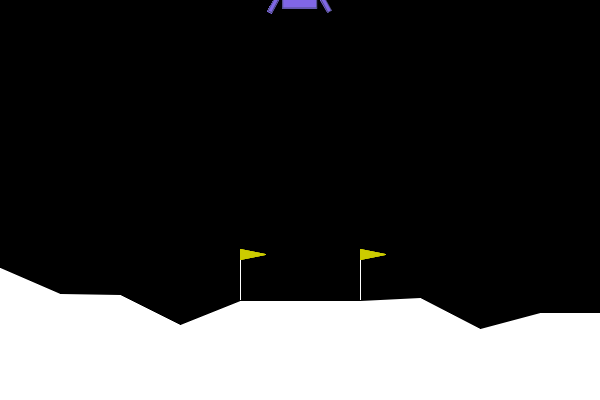

In [ ]:
best_lunar = DQN.load('rl_models/lunar_lander/model_05000.zip')

lunar_sb3 = SB3Agent(best_lunar)

lunar_eval = evaluate(ll_env,
                      lunar_sb3,
                      gamma = 1.0,
                      episodes = 20,
                      max_steps = 1000,
                      seed = 1)

create_gif(ll_env, lunar_sb3, max_steps = 1000, seed = 1, folder = 'gifs', filename = 'lunar_sb3', display_gif = True)

## 2.D - Load and Evaluation Partially Trained Model (30K)

We will now look at a model that has been trained for 30,000 time steps. Repeat the steps from 2.B using the model stored in the file `model_30000.zip`. You should observe that the agent has learned to get close to the ground, but will still not land.


Mean Return:    182.6404
StdDev Return:  88.0193
Mean Length:    548.8
StdDev Length:  169.8316
1000 steps completed.
Cumulative reward: -9.563


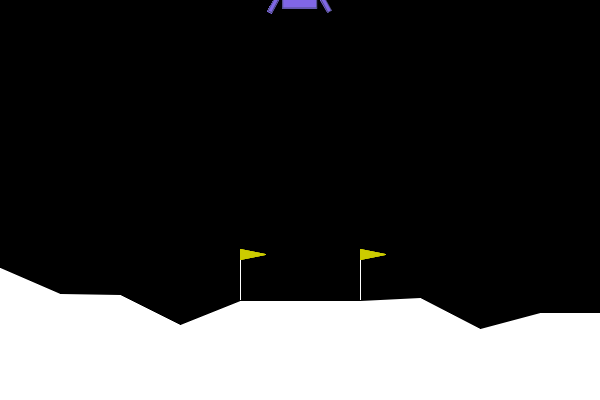

In [ ]:
best_lunar = DQN.load('rl_models/lunar_lander/model_30000.zip')

lunar_sb3 = SB3Agent(best_lunar)

lunar_eval = evaluate(ll_env,
                      lunar_sb3,
                      gamma = 1.0,
                      episodes = 20,
                      max_steps = 1000,
                      seed = 1)

create_gif(ll_env, lunar_sb3, max_steps = 1000, seed = 1, folder = 'gifs', filename = 'lunar_sb3', display_gif = True)

## 2.E - Continued Training

We will now train the 30K model for another 30K timesteps. In addition to loading the model, we will also reload the replay buffer containing the experiences generated during the first 30K timesteps. Use the cell below to perform the following steps:
1. Create three new instances of the Lunar Lander environment: One for training, one for evaluation, and one for testing.
2. Create an `EvalCallback` object using the evaluation environment. Set the calback to run the evalation every 2000 time steps, using 20 episodes for each evaluation. Set `warn=False`. **When specifying a directory for the evaluation callback, you should use a different name from what was used in Part 1.**
3. Reload `model_30000.zip` into a new DQN model. Use the training environment when loading the model.
4. Use the `load_replay_buffer()` to load the replay buffer into the model. This is stored in the file `buffer_30000.pkl`.
4. The exploration rate for the model is currently 0.1. Reduce this to 0.05 using the following line of code: `model.exploration_rate = 0.05`.
5. Train the model for an additional 30,000 time steps, using the callback created. Set `progress_bar=False`.

This will likely take 5-10 minutes to run. When completed, you should see that the model is somewhat consistently achieving mean returns higher than 200.

In [ ]:
ll_train_env = gym.make("LunarLander-v2", render_mode='rgb_array')
ll_eval_env = gym.make("LunarLander-v2", render_mode='rgb_array')
ll_test_env = gym.make("LunarLander-v2", render_mode='rgb_array')

if os.path.exists('ll_eval/') : shutil.rmtree('ll_eval/')
ll_callback = EvalCallback(ll_eval_env,
                           n_eval_episodes = 20,
                           eval_freq = 2000,
                           best_model_save_path = 'll_eval/',
                           log_path = 'll_eval/',
                           warn = False
                          )
loaded_ll_model = DQN.load('rl_models/lunar_lander/model_30000.zip', ll_train_env)

loaded_ll_model.load_replay_buffer('rl_models/lunar_lander/buffer_30000')

loaded_ll_model.exploration_rate = .05

loaded_ll_model.learn(total_timesteps = 30000, callback = ll_callback, progress_bar = False)

Eval num_timesteps=2000, episode_reward=161.36 +/- 147.04
Episode length: 467.55 +/- 173.95
New best mean reward!
Eval num_timesteps=4000, episode_reward=247.15 +/- 24.42
Episode length: 427.60 +/- 135.39
New best mean reward!
Eval num_timesteps=6000, episode_reward=248.08 +/- 30.22
Episode length: 422.05 +/- 174.53
New best mean reward!
Eval num_timesteps=8000, episode_reward=180.71 +/- 116.22
Episode length: 507.15 +/- 297.17
Eval num_timesteps=10000, episode_reward=202.26 +/- 99.21
Episode length: 458.10 +/- 228.70
Eval num_timesteps=12000, episode_reward=196.50 +/- 84.86
Episode length: 531.00 +/- 282.38
Eval num_timesteps=14000, episode_reward=249.10 +/- 29.19
Episode length: 361.95 +/- 150.19
New best mean reward!
Eval num_timesteps=16000, episode_reward=244.68 +/- 48.86
Episode length: 475.40 +/- 223.60
Eval num_timesteps=18000, episode_reward=216.41 +/- 93.49
Episode length: 424.85 +/- 263.60
Eval num_timesteps=20000, episode_reward=197.37 +/- 89.45
Episode length: 478.60 +/- 2

## 2.F - Evaluating Final Model

Use the cell below to load the best model encountered during training, passing the test environment to the `env` parameter for the `DQN.load()` method. Create an instance of `SB3Agent` using this model. Then use the `evaluate()` function to score the model, setting `gamma=1.0`, `episodes=50`, and `max_steps=1000`.

In [ ]:
best_ll_model = DQN.load('ll_eval/best_model.zip', env = ll_test_env)

best_ll_sb3 = SB3Agent(model = best_ll_model)

ll_eval = evaluate(ll_test_env, best_ll_sb3, gamma = 1.0, episodes = 50, max_steps = 1000)

Mean Return:    223.5988
StdDev Return:  67.4496
Mean Length:    416.42
StdDev Length:  200.5563


## 2.G - Display Episode

Use the `create_gif()` function to display an episode guided by the trained DQN agent. Set a seed and `max_steps=1000`.

If if your agent has a high mean return, it will also likely have a moderately high variance. This means that the agent will perform well on average, but might occasionally generate poor episodes. Some seed values might result in poor performance. **Adjust the seed for the `create_gif()` function until you find an episode demonstrating good performance.** Your goal is to find an episode in which the agent has a smooth landing between the two flags and earns a total return of at least 220. It should be possible to find an episode with a return of at least 250, but that is not required.  

**Note:** There are special instructions relating to this cell in the submission instructions below. Please read those carefully.

254 steps completed.
Cumulative reward: 253.0697


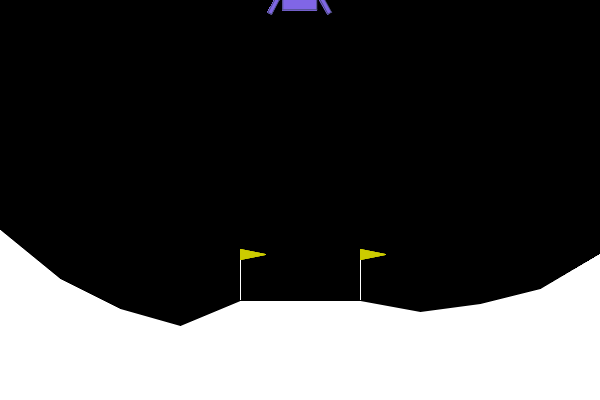

In [ ]:
create_gif(ll_test_env,
           best_ll_sb3,
           max_steps = 1000,
           seed = 41,
           folder = 'gifs',
           filename = 'best_lunar',
           display_gif = True)

# Important Note about Submissions

The training process for SB3 models involves many stochastic elements, and these elements come from different packages that have their own random number generators. In most cases, it is very difficult, and sometimes impossible, to use seeds to guarantee fully deterministic behavior.

One consequence of this relates to 2.G above. Suppose you find a seed that meets the criteria detailed in 2.G. When you re-run the notebook for submission, your model might be slightly different, and your previous seed might not work any longer.

**After re-running your notebook for submission, you should check 2.G to confirm that the current seed is still satisfactory.** If it is not, then you can change the seed and re-run this cell as needed. When you have found a satisfactory seed, you can re-run the last cell of the notebook to create a new HTML render for your notebook.

The submission instructions below have been updated to include the special instructions related to cell 2.G.

# Submission Instructions

1. The cell below will generate an HTML render of your notebook within the same Google Drive folder in which you stored this notebook. Adjust the path for your notebook in the cell below as needed.
2. Restart your notebook and run it from start to finish.
3. Adjust the seed in 2.G as needed. When done with that, re-run the cell below to create a new HTML render for your notebook.
4. If the notebook executes without error, download the HTML export of the notebook and then upload it to Canvas. Make sure to carefully review the contents of the HTML export to ensure that everything is displayed correctly.
5. Click on "Share" in the upper-right corner of this notebook. Then select "Anyone with the link" from dropdown. Click "Copy Link" and paste the copied link as a comment in your submission on Canvas.


In [ ]:
#%%capture
import time
time.sleep(30)
!jupyter nbconvert --to html /content/drive/MyDrive/COSC_635/Lab_05_zziauddin1.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/COSC_635/Lab_05_zziauddin1.ipynb to html
[NbConvertApp] Writing 2287792 bytes to /content/drive/MyDrive/COSC_635/Lab_05_zziauddin1.html
